# **Import libraries**

In [1]:
import pandas as pd
import geopandas as gpd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from folium.plugins import MarkerCluster
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('/kaggle/input/library-services-dataset/Library_Services_20240831.csv')
print(df.info())
print(df.isnull().sum())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 105 entries, Branch to Location
dtypes: float64(18), int64(4), object(83)
memory usage: 17.4+ KB
None
Branch         0
Webpage        0
Address        0
City           0
Zip            0
              ..
metrobus Z6    0
metrobus Z9    0
Latitude       0
Longitude      0
Location       0
Length: 105, dtype: int64
Index(['Branch', 'Webpage', 'Address', 'City', 'Zip', 'Square Feet',
       'Inventory', 'Population Size', 'Phone', 'TTY Phone',
       ...
       'metrobus Q1', 'metrobus Q2', 'metrobus T2', 'metrobus z2',
       'metrobus Z8', 'metrobus Z6', 'metrobus Z9', 'Latitude', 'Longitude',
       'Location'],
      dtype='object', length=105)


# **EDA**

In [3]:
df = df[['Branch', 'Square Feet', 'Inventory', 'Latitude', 'Longitude']]

df.columns = df.columns.str.lower().str.replace(' ', '_')

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Geospatial Analysis
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)


for idx, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['branch']).add_to(m)

m.save('library_map.html')
m

        square_feet      inventory
count     21.000000      21.000000
mean   26812.285714   90176.142857
std    23608.740361   41029.650207
min      925.000000   12072.000000
25%    16000.000000   73559.000000
50%    16895.000000   87423.000000
75%    27280.000000  110165.000000
max    90000.000000  176961.000000

Correlation Matrix:
             square_feet  inventory
square_feet     1.000000   0.656394
inventory       0.656394   1.000000


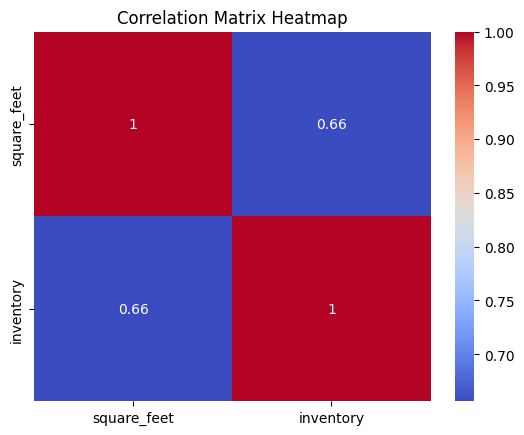

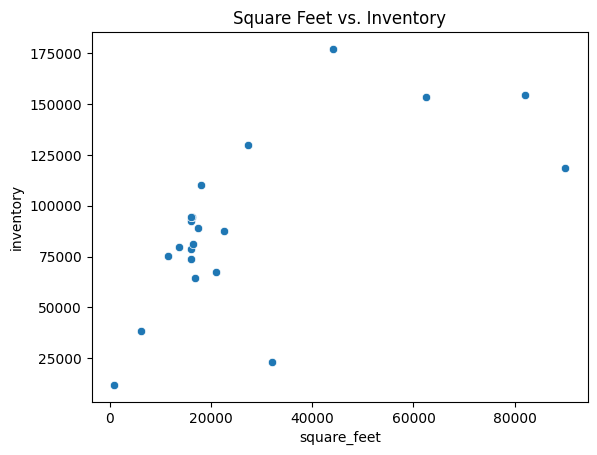

In [4]:

X = df[['square_feet']]
y = df['inventory']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)


print(df[['square_feet', 'inventory']].describe())


correlation_matrix = df[['square_feet', 'inventory']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Scatter plot
sns.scatterplot(x='square_feet', y='inventory', data=df)
plt.title("Square Feet vs. Inventory")
plt.show()

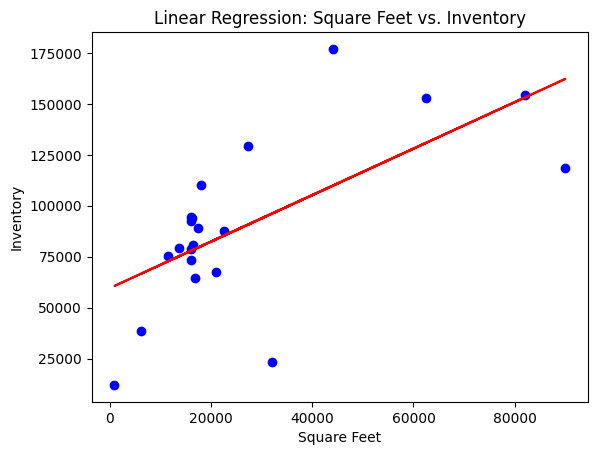


Resource Utilization (Inventory per Square Foot):
                branch  inventory_per_sqft
0           Aspen Hill            4.884907
1         Gaithersburg            2.447901
2   Maggie Nightingale            6.152960
3              Potomac            5.789250
4            White Oak            5.814070
5          Chevy Chase            5.820299
6           Germantown            4.004277
7          Long Branch            3.199534
8                Olney            3.872730
9       Connie Morella            4.748827
10       Silver Spring            1.315522
11               Noyes           13.050811
12     Kensington Park            4.597437
13            Damascus            4.937256
14           Twinbrook            3.814916
15           Rockville            1.880922
16    Marilyn Praisner            5.086629
17        Little Falls            6.563304
18             Wheaton            0.723437
19               Davis            5.901875
20      Quince Orchard            6.123339


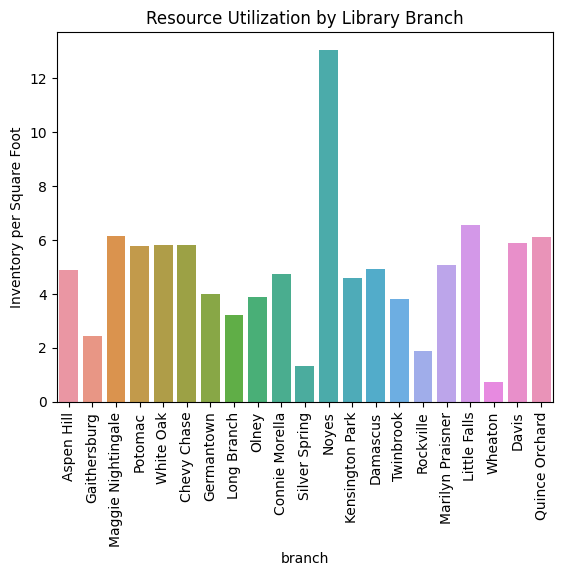

In [5]:
plt.scatter(df['square_feet'], df['inventory'], color='blue')
plt.plot(df['square_feet'], predictions, color='red')
plt.title("Linear Regression: Square Feet vs. Inventory")
plt.xlabel("Square Feet")
plt.ylabel("Inventory")
plt.show()

df['inventory_per_sqft'] = df['inventory'] / df['square_feet']
print("\nResource Utilization (Inventory per Square Foot):")
print(df[['branch', 'inventory_per_sqft']])


sns.barplot(x='branch', y='inventory_per_sqft', data=df)
plt.xticks(rotation=90)
plt.title("Resource Utilization by Library Branch")
plt.ylabel("Inventory per Square Foot")
plt.show()

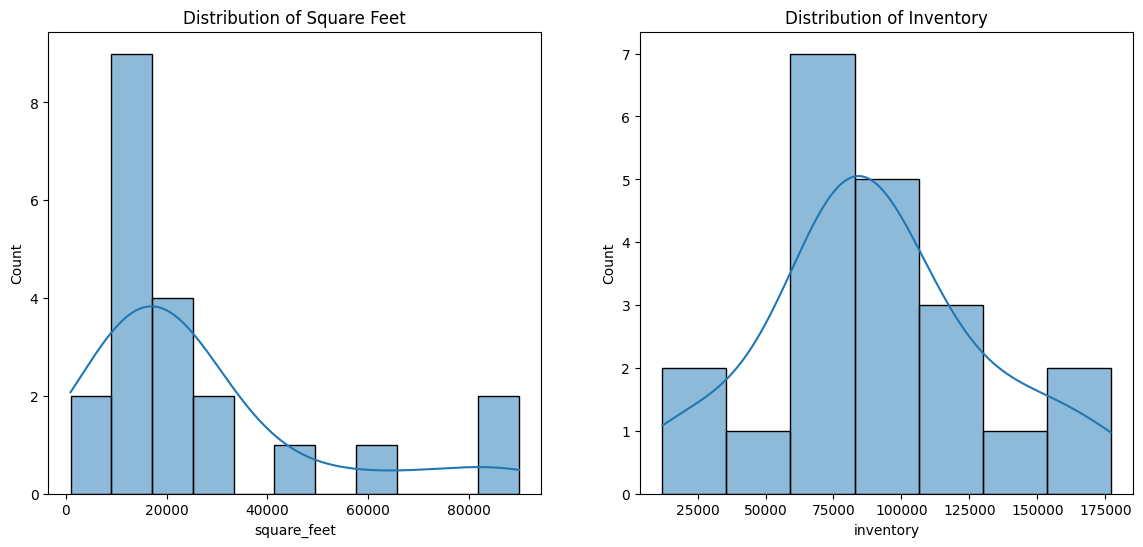

In [6]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['square_feet'], kde=True)
plt.title("Distribution of Square Feet")

plt.subplot(1, 2, 2)
sns.histplot(df['inventory'], kde=True)
plt.title("Distribution of Inventory")

plt.show()

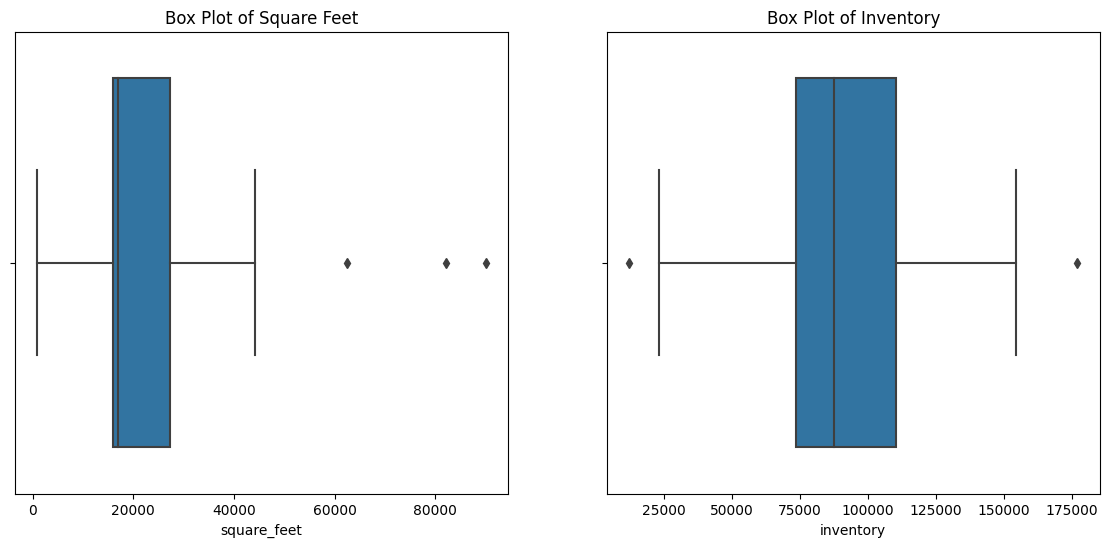

In [7]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['square_feet'])
plt.title("Box Plot of Square Feet")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['inventory'])
plt.title("Box Plot of Inventory")

plt.show()

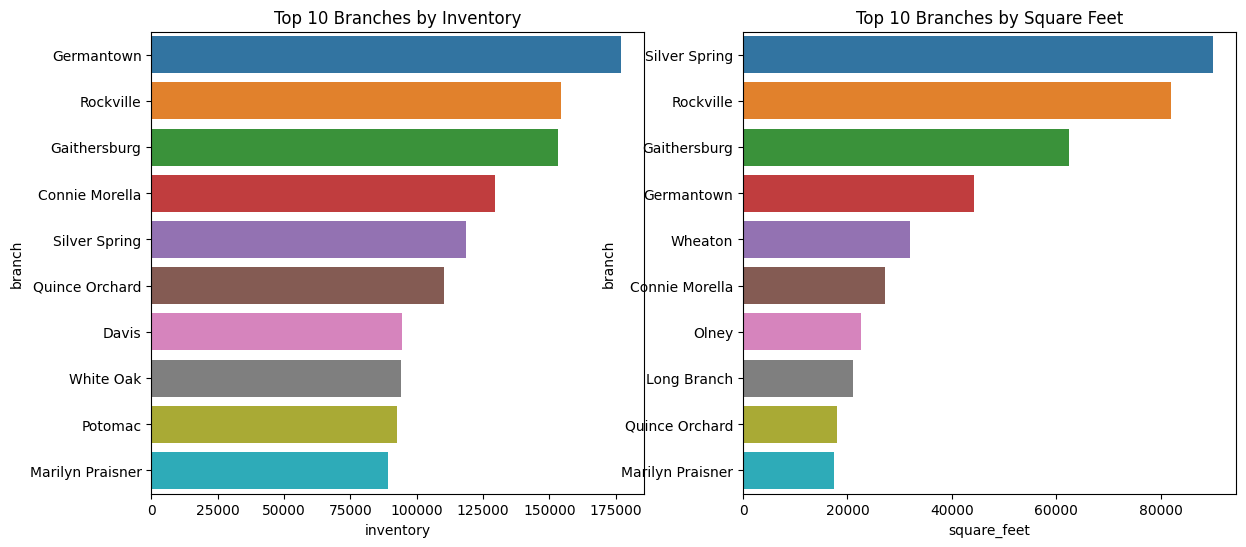

In [8]:

top_n = 10

top_inventory_branches = df.nlargest(top_n, 'inventory')
top_square_feet_branches = df.nlargest(top_n, 'square_feet')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='inventory', y='branch', data=top_inventory_branches)
plt.title(f"Top {top_n} Branches by Inventory")

plt.subplot(1, 2, 2)
sns.barplot(x='square_feet', y='branch', data=top_square_feet_branches)
plt.title(f"Top {top_n} Branches by Square Feet")

plt.show()

In [9]:
cluster_map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)
marker_cluster = MarkerCluster().add_to(cluster_map)

for idx, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['branch']).add_to(marker_cluster)

display(cluster_map)
